**Modelos basados en árbol / Predicción de Precios de Vehículos Usados (Core)**

## **Predicción de Precios de Vehículos Usados (Core)**

implementar y evaluar modelos de regresión, y seleccionar el mejor modelo basado en las métricas de evaluación.

**Requisitos:**
 
**1. Carga y Exploración de Datos:**

Descargar y cargar el dataset.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv('../../data/ml/Vehicles.csv')

# Exploración de datos
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [4]:
pd.options.display.max_columns = 999

**Realizar una exploración inicial para entender la estructura del dataset.**

In [5]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [6]:
# Ver los últimos registros
print(df.tail())

                id                                                url  \
426875  7301591192  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426876  7301591187  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426877  7301591147  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426878  7301591140  https://wyoming.craigslist.org/ctd/d/atlanta-2...   
426879  7301591129  https://wyoming.craigslist.org/ctd/d/atlanta-2...   

         region                      region_url  price    year manufacturer  \
426875  wyoming  https://wyoming.craigslist.org  23590  2019.0       nissan   
426876  wyoming  https://wyoming.craigslist.org  30590  2020.0        volvo   
426877  wyoming  https://wyoming.craigslist.org  34990  2020.0     cadillac   
426878  wyoming  https://wyoming.craigslist.org  28990  2018.0        lexus   
426879  wyoming  https://wyoming.craigslist.org  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
426875   

In [7]:
# Recuento de valores nulos por columna
print(df.isnull().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


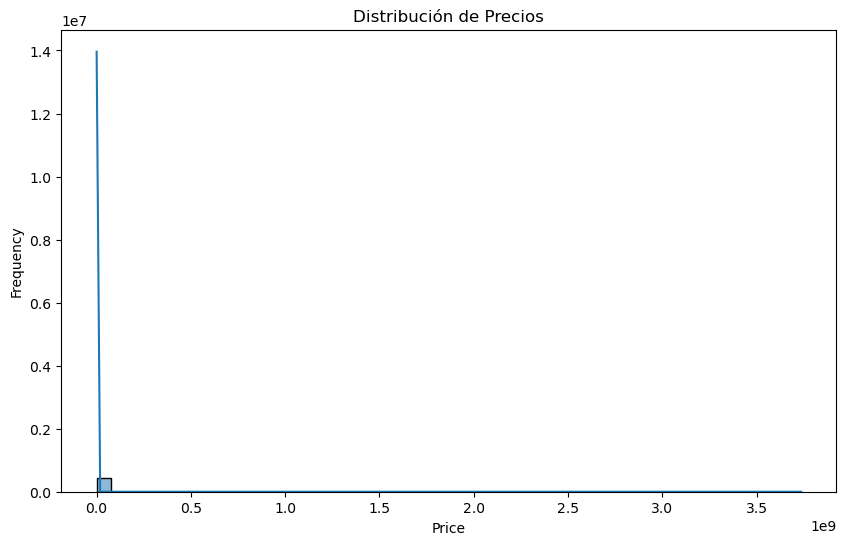

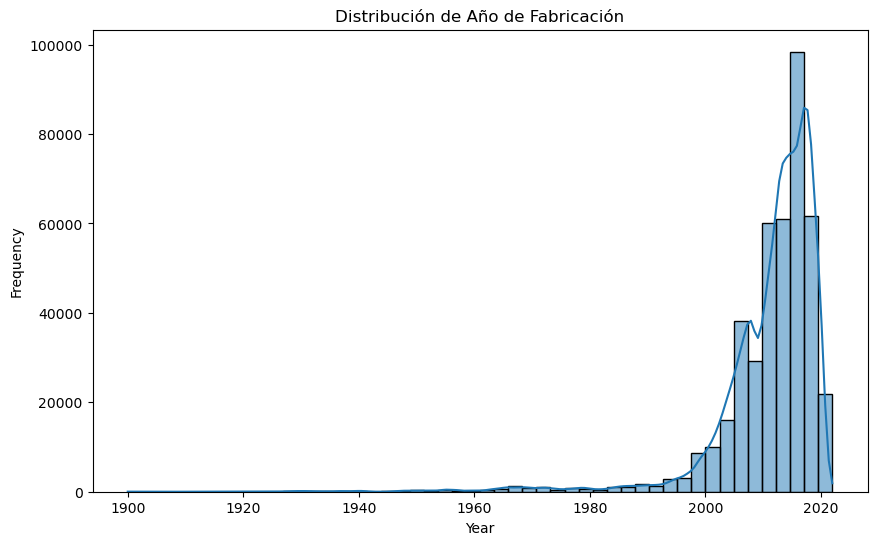

In [8]:
# Histograma de la columna de precio
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Histograma del año de fabricación
plt.figure(figsize=(10, 6))
sns.histplot(df['year'], bins=50, kde=True)
plt.title('Distribución de Año de Fabricación')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


In [9]:
import utils
# Reemplazamos los valores faltantes en las columnas categóricas con "no identificado"
df[['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 
    'transmission', 'drive', 'type', 'paint_color']] = df[
    ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 
     'transmission', 'drive', 'type', 'paint_color']
].fillna("no identificado")

# Calcula estadísticas de valores faltantes
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
county,0,426880,100.00
size,120519,306361,71.77
VIN,265838,161042,37.73
long,420331,6549,1.53
lat,420331,6549,1.53
odometer,422480,4400,1.03
year,425675,1205,0.28
posting_date,426812,68,0.02
description,426810,70,0.02
image_url,426812,68,0.02


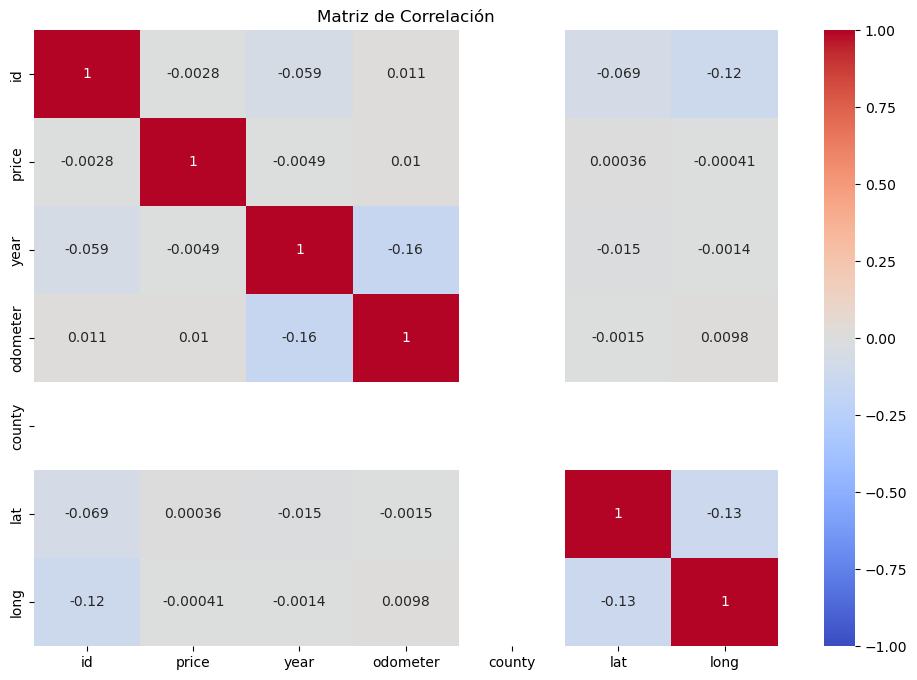

In [10]:
# Seleccionar sólo las columnas numéricas para calcular la matriz de correlación
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación para las columnas numéricas
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

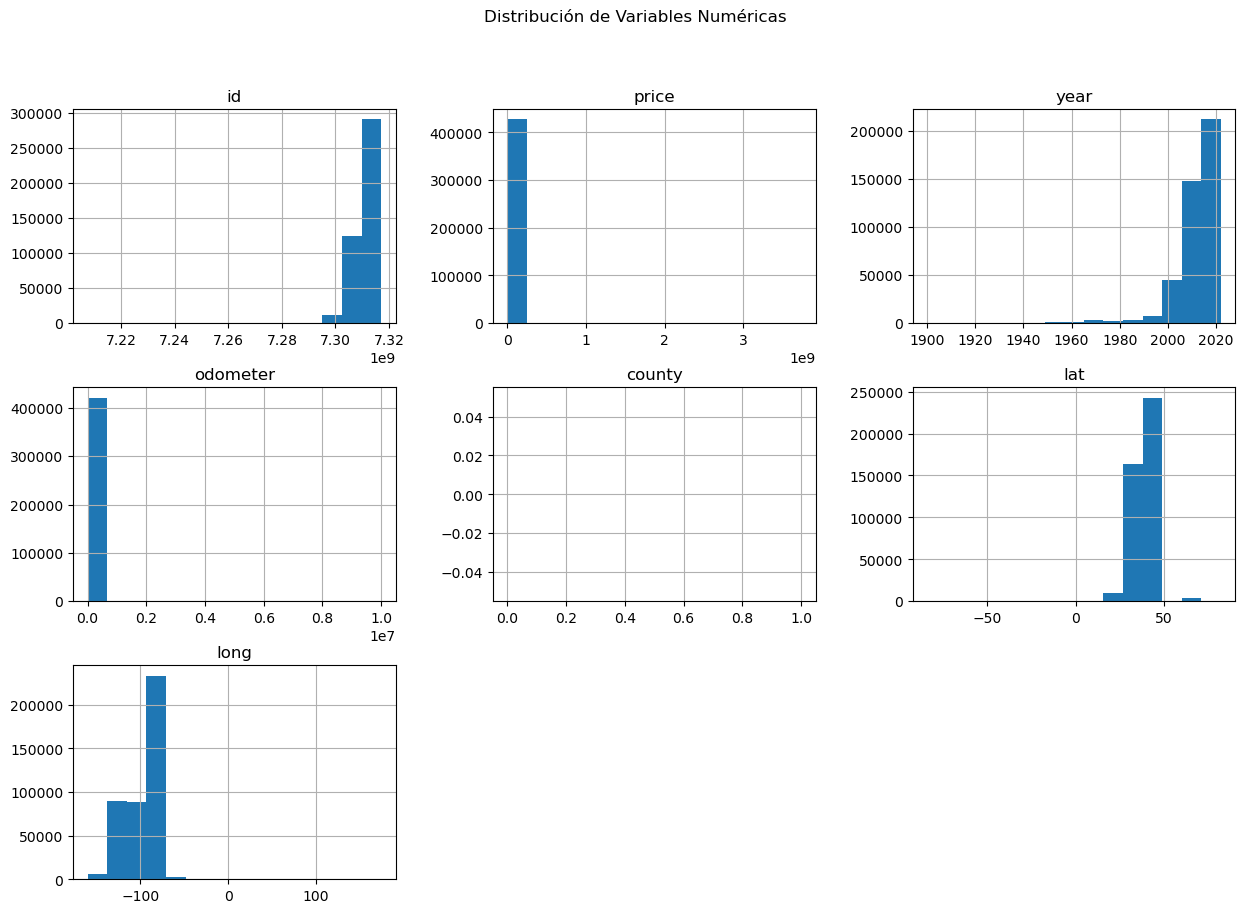

In [11]:
# Graficar histogramas para cada columna numérica
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()

**Identificar valores faltantes, duplicados y outliers**

In [12]:
# 1. Identificar valores faltantes
faltantes = df.isnull().sum()
print("Valores faltantes por columna:")
print(faltantes[faltantes > 0])

# 2. Identificar filas duplicadas
duplicados = df.duplicated().sum()
print("\nNúmero de filas duplicadas:", duplicados)

# 3. Identificar outliers usando el método del rango intercuartílico (IQR) para las columnas numéricas
# Seleccionar sólo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers (valores que están fuera de 1.5 * IQR)
outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()
print("\nNúmero de outliers por columna:")
print(outliers[outliers > 0])

Valores faltantes por columna:
year              1205
odometer          4400
VIN             161042
size            306361
image_url           68
description         70
county          426880
lat               6549
long              6549
posting_date        68
dtype: int64

Número de filas duplicadas: 0

Número de outliers por columna:
id             44
price        8177
year        15896
odometer     4385
lat          6413
long          195
dtype: int64


In [13]:
df = df.drop(columns=['county'])
df = df.drop(columns=['id', 'url', 'region_url', 'VIN', 'image_url'])
# Eliminación de columnas irrelevantes para el modelado
df = df.drop(columns=[ 'posting_date', 'lat', 'long', 'size'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  426880 non-null  object 
 4   model         426880 non-null  object 
 5   condition     426880 non-null  object 
 6   cylinders     426880 non-null  object 
 7   fuel          426880 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  426880 non-null  object 
 10  transmission  426880 non-null  object 
 11  drive         426880 non-null  object 
 12  type          426880 non-null  object 
 13  paint_color   426880 non-null  object 
 14  description   426810 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 52.1+ MB


In [15]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
odometer,422480,4400,1.03
year,425675,1205,0.28
description,426810,70,0.02
region,426880,0,0.00
price,426880,0,0.00
manufacturer,426880,0,0.00
model,426880,0,0.00
condition,426880,0,0.00
cylinders,426880,0,0.00
fuel,426880,0,0.00


**Corregir inconsistencias en los datos categóricos.**

In [16]:
import json
# Lista de columnas categóricas a revisar
categorical_cols = ['region', 'manufacturer', 'model', 'condition', 'cylinders', 
                    'fuel', 'title_status', 'transmission', 'drive', 'type', 
                    'paint_color', 'state']
# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()  # Eliminar NaN y convertir a lista
    valores_unicos[col] = unique_vals
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_vals)

# Ruta donde se guardará el archivo JSON
ruta_json = '../../data/ml/valores_unicos_iniciales.json'
# Guardar el diccionario en un archivo JSON
with open(ruta_json, 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print(f"\nValores únicos guardados en '{ruta_json}'")


Valores únicos en la columna 'region':
['prescott', 'fayetteville', 'florida keys', 'worcester / central MA', 'greensboro', 'hudson valley', 'medford-ashland', 'erie', 'el paso', 'bellingham', 'skagit / island / SJI', 'la crosse', 'auburn', 'birmingham', 'dothan', 'florence / muscle shoals', 'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery', 'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula', 'southeast alaska', 'flagstaff / sedona', 'mohave county', 'phoenix', 'show low', 'sierra vista', 'tucson', 'yuma', 'fort smith', 'jonesboro', 'little rock', 'texarkana', 'bakersfield', 'chico', 'fresno / madera', 'gold country', 'hanford-corcoran', 'humboldt county', 'imperial county', 'inland empire', 'los angeles', 'mendocino county', 'merced', 'modesto', 'monterey bay', 'orange county', 'palm springs', 'redding', 'reno / tahoe', 'sacramento', 'san diego', 'san luis obispo', 'santa barbara', 'santa maria', 'SF bay area', 'siskiyou county', 'stockton', 'susanvil

In [17]:
def limpiar_cadena(valor):
    if isinstance(cadena, str):
        # 1. Convertir todo a minúsculas
        cadena = cadena.lower()
        
        # 2. Eliminar caracteres no imprimibles antes de la primera letra y después de la última letra
        # Buscar la posición de la primera letra (a-z)
        primer_letra = re.search(r'[a-z]', cadena)
        # Buscar la posición de la última letra (a-z)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)
        
        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            # Si no se encuentran letras, eliminar espacios en blanco
            cadena = cadena.strip()
        
        return cadena
    return cadena

# Definir la función limpiar_cadena para limpiar texto en cada columna
def limpiar_cadena(valor):
    if isinstance(valor, str):
        # 1. Convertir todo a minúsculas
        cadena = cadena.lower()

        # 2. Eliminar caracteres no imprimibles antes de la primera letra y después de la última letra
        # Buscar la posición de la primera letra (a-z)
        primer_letra = re.search(r'[a-z]', cadena)
        # Buscar la posición de la última letra (a-z)
        ultima_letra = re.search(r'[a-z](?!.*[a-z])', cadena)

        if primer_letra and ultima_letra:
            inicio = primer_letra.start()
            fin = ultima_letra.end()
            cadena = cadena[inicio:fin]
        else:
            # Si no se encuentran letras, eliminar espacios en blanco
            cadena = cadena.strip()        
        return cadena
        return valor


# Definir la función limpiar_cadena para limpiar texto en cada columna
def limpiar_cadena(valor):
    if isinstance(valor, str):
        return valor.strip().lower()
    return valor

# Aplicar la limpieza a las columnas categóricas
for col in categorical_cols:
    df[col] = df[col].apply(limpiar_cadena)
# Verificar los cambios
for col in categorical_cols:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(df[col].unique())



Valores únicos después de limpieza en 'region':
['prescott' 'fayetteville' 'florida keys' 'worcester / central ma'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / sji' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'sf bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 

In [18]:
# Guardar los valores únicos en un archivo JSON para referencia
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()
    valores_unicos[col] = unique_vals
# Guardar en 'valores_unicos.json'
with open('../../data/ml/valores_unicos_finales.json', 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print("Valores únicos guardados en 'valores_unicos.json'.")

Valores únicos guardados en 'valores_unicos.json'.


In [19]:
valores_categoricos = df.select_dtypes(include = 'category')
valores_categoricos

""
0
1
2
3
4
...
426875
426876
426877
426878


### **Manejo de valores faltantes**

Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato

In [20]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
odometer,422480,4400,1.03
year,425675,1205,0.28
description,426810,70,0.02
region,426880,0,0.00
price,426880,0,0.00
manufacturer,426880,0,0.00
model,426880,0,0.00
condition,426880,0,0.00
cylinders,426880,0,0.00
fuel,426880,0,0.00


In [21]:
# Diccionario de tipos de datos para cada columna
dtype_conversion = {
    'region': 'category',
    'price': 'int64',
    'year': 'float64',
    'manufacturer': 'category',
    'model': 'category',
    'condition': 'category',
    'cylinders': 'category',
    'fuel': 'category',
    'odometer': 'float64',
    'title_status': 'category',
    'transmission': 'category',
    'drive': 'category',
    'type': 'category',
    'paint_color': 'category',
    'description': 'object',  # Puede mantenerse como texto
    'state': 'category'
}

# Aplicar la conversión de tipos de datos
df = df.astype(dtype_conversion)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   region        426880 non-null  category
 1   price         426880 non-null  int64   
 2   year          425675 non-null  float64 
 3   manufacturer  426880 non-null  category
 4   model         426880 non-null  category
 5   condition     426880 non-null  category
 6   cylinders     426880 non-null  category
 7   fuel          426880 non-null  category
 8   odometer      422480 non-null  float64 
 9   title_status  426880 non-null  category
 10  transmission  426880 non-null  category
 11  drive         426880 non-null  category
 12  type          426880 non-null  category
 13  paint_color   426880 non-null  category
 14  description   426810 non-null  object  
 15  state         426880 non-null  category
dtypes: category(12), float64(2), int64(1), object(1)
memory usage: 20.0+ MB


In [23]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 31710


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state
0,prescott,6000,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,az
1,fayetteville,11900,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,ar
2,florida keys,21000,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,fl
3,worcester / central ma,1500,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,ma
4,greensboro,4900,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,nc


In [24]:
df = df.drop_duplicates()

In [25]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 0


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,description,state
0,prescott,6000,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,az
1,fayetteville,11900,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,ar
2,florida keys,21000,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,fl
3,worcester / central ma,1500,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,ma
4,greensboro,4900,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,no identificado,no identificado,no identificado,no identificado,no identificado,NaN,nc


In [26]:
numeric_col = df.select_dtypes('float','int')
categorical_cols = df.select_dtypes('category','bool')

numeric_col

,year,odometer
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
426875,2019.0,32226.0
426876,2020.0,12029.0
426877,2020.0,4174.0
426878,2018.0,30112.0


In [27]:
# Seleccionar columnas numéricas y categóricas
numeric_cols = df.select_dtypes(include=['float', 'int'])
categorical_cols = df.select_dtypes(include=['category', 'bool', 'object'])

# Obtener valores únicos en columnas categóricas
unique_values_categorical = {col: categorical_cols[col].unique() for col in categorical_cols.columns}

# Mostrar valores únicos
#print("Valores únicos en columnas numéricas:", unique_values_numeric)
print("Valores únicos en columnas categóricas:", unique_values_categorical)


Valores únicos en columnas categóricas: {'region': ['prescott', 'fayetteville', 'florida keys', 'worcester / central ma', 'greensboro', ..., 'milwaukee', 'northern wi', 'sheboygan', 'wausau', 'wyoming']
Length: 404
Categories (404, object): ['abilene', 'akron / canton', 'albany', 'albuquerque', ..., 'youngstown', 'yuba-sutter', 'yuma', 'zanesville / cambridge'], 'manufacturer': ['no identificado', 'gmc', 'chevrolet', 'toyota', 'ford', ..., 'harley-davidson', 'datsun', 'aston-martin', 'land rover', 'morgan']
Length: 43
Categories (43, object): ['acura', 'alfa-romeo', 'aston-martin', 'audi', ..., 'tesla', 'toyota', 'volkswagen', 'volvo'], 'model': ['no identificado', 'sierra 1500 crew cab slt', 'silverado 1500', 'silverado 1500 crew', 'tundra double cab sr', ..., 'rx& gls sport', 'ati', 'gand wagoneer', '96 suburban', 'paige glenbrook touring']
Length: 28577
Categories (28577, object): ['"t"', '$362.47, $1000 down, oac, 2.9%apr $362.47,lux..., '%', '& altima', ..., '♿', '♿ vmi', '𝓜𝓮𝓻𝓬𝓮𝓭𝓮

In [28]:
import pandas as pd

# Definir un diccionario para almacenar el resumen de los outliers
outliers_summary = {}

# Para cada columna numérica
for col in numeric_cols.columns:
    # Calcular el rango intercuartílico (IQR)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identificar outliers (valores fuera de [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR])
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    
    # Añadir al diccionario: columna y número de outliers
    outliers_summary[col] = {
        'outliers_count': outliers.shape[0],
        'outliers_percentage': 100 * outliers.shape[0] / df.shape[0]
    }

# Mostrar el resumen de outliers
outliers_summary


{'price': {'outliers_count': 7260, 'outliers_percentage': 1.8371839967608876},
 'year': {'outliers_count': 15415, 'outliers_percentage': 3.900852797530177},
 'odometer': {'outliers_count': 4058,
  'outliers_percentage': 1.0268998152693778}}

In [29]:
# Identificar columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()

print("\nColumnas numéricas identificadas:")
print(columnas_numericas)


Columnas numéricas identificadas:
['price', 'year', 'odometer']


In [30]:
# Calcular la matriz de correlación utilizando Pearson
matriz_correlacion = df[columnas_numericas].corr(method='pearson')
# Mostrar la matriz de correlación
print("\nMatriz de Correlación (Pearson):")
matriz_correlacion


Matriz de Correlación (Pearson):


,price,year,odometer
price,1.000000,-0.005020,0.010778
year,-0.005020,1.000000,-0.164376
odometer,0.010778,-0.164376,1.000000


In [31]:
# Imputar valores nulos
df['odometer'].fillna(df['odometer'].median(), inplace=True)  # Mediana para odometer
df['year'].fillna(df['year'].mode()[0], inplace=True)         # Moda para year
df['description'].fillna('Sin descripción', inplace=True)     # Texto fijo para description

print(df)

                        region  price    year     manufacturer  \
0                     prescott   6000  2018.0  no identificado   
1                 fayetteville  11900  2018.0  no identificado   
2                 florida keys  21000  2018.0  no identificado   
3       worcester / central ma   1500  2018.0  no identificado   
4                   greensboro   4900  2018.0  no identificado   
...                        ...    ...     ...              ...   
426875                 wyoming  23590  2019.0           nissan   
426876                 wyoming  30590  2020.0            volvo   
426877                 wyoming  34990  2020.0         cadillac   
426878                 wyoming  28990  2018.0            lexus   
426879                 wyoming  30590  2019.0              bmw   

                           model        condition        cylinders  \
0                no identificado  no identificado  no identificado   
1                no identificado  no identificado  no identificado 

C:\Users\user\AppData\Local\Temp\ipykernel_15772\735781224.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['odometer'].fillna(df['odometer'].median(), inplace=True)  # Mediana para odometer
C:\Users\user\AppData\Local\Temp\ipykernel_15772\735781224.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [32]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
region,395170,0,0.0
price,395170,0,0.0
year,395170,0,0.0
manufacturer,395170,0,0.0
model,395170,0,0.0
condition,395170,0,0.0
cylinders,395170,0,0.0
fuel,395170,0,0.0
odometer,395170,0,0.0
title_status,395170,0,0.0


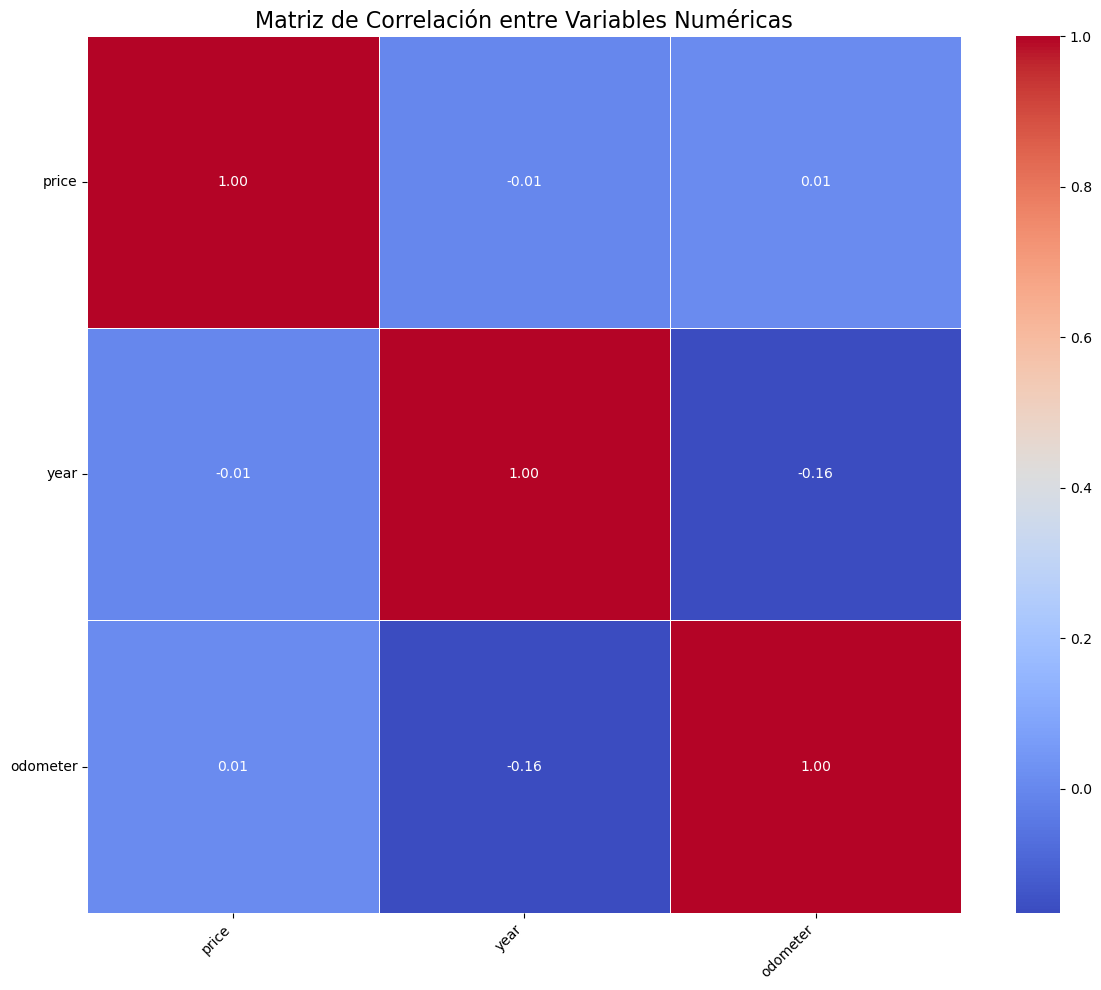

In [33]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))
# Crear el heatmap utilizando seaborn
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
# Añadir títulos y etiquetas
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# Mostrar el gráfico
plt.tight_layout()
plt.show()

**Escalar las características numéricas.**

In [34]:

# Identificar columnas numéricas y categóricas
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
categorical_features = df.select_dtypes(exclude=['number']).columns.tolist()

# Obtener los índices
numeric_indices = [df.columns.get_loc(col) for col in numeric_features]
categorical_indices = [df.columns.get_loc(col) for col in categorical_features]

print("Columnas numéricas (nombres):", numeric_features)
print("Columnas numéricas (índices):", numeric_indices)
print("Columnas categóricas (nombres):", categorical_features)
print("Columnas categóricas (índices):", categorical_indices)

Columnas numéricas (nombres): ['price', 'year', 'odometer']
Columnas numéricas (índices): [1, 2, 8]
Columnas categóricas (nombres): ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'description', 'state']
Columnas categóricas (índices): [0, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15]


In [35]:
df['year'] = df['year'].astype('int64')

In [36]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['category']).columns.tolist()

print("Columnas numéricas:", numeric_features)
print("Columnas categóricas:", categorical_features)

# Crear X usando las columnas seleccionadas
X = df[numeric_features + categorical_features]

print("Dimensiones de X:", X.shape)

Columnas numéricas: ['price', 'year', 'odometer']
Columnas categóricas: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
Dimensiones de X: (395170, 15)


In [37]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
region,395170,0,0.0
price,395170,0,0.0
year,395170,0,0.0
manufacturer,395170,0,0.0
model,395170,0,0.0
condition,395170,0,0.0
cylinders,395170,0,0.0
fuel,395170,0,0.0
odometer,395170,0,0.0
title_status,395170,0,0.0


In [38]:
df['manufacturer'] = df['manufacturer'].apply(
    lambda x: 'Desconocido' if pd.isnull(x) else x
)


In [39]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
region,395170,0,0.0
price,395170,0,0.0
year,395170,0,0.0
manufacturer,395170,0,0.0
model,395170,0,0.0
condition,395170,0,0.0
cylinders,395170,0,0.0
fuel,395170,0,0.0
odometer,395170,0,0.0
title_status,395170,0,0.0


**Realizar transformaciones necesarias para las características categóricas.**

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df.select_dtypes(include=['category']).columns.tolist()

print("Columnas numéricas:", numeric_features)
print("Columnas categóricas:", categorical_features)

# Crear X usando las columnas seleccionadas
X = df[numeric_features + categorical_features]

print("Dimensiones de X:", X.shape)

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = SimpleImputer(strategy='mean')  # Imputación de la media para valores numéricos
categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # OneHotEncoder para valores categóricos

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Aplicar el preprocesamiento
X_transformed = preprocessor.fit_transform(X)

print("Dimensiones después del preprocesamiento:", X_transformed.shape)



Columnas numéricas: ['price', 'year', 'odometer']
Columnas categóricas: ['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']
Dimensiones de X: (395170, 15)
Dimensiones después del preprocesamiento: (395170, 29142)


In [41]:
# Paso 1: Identificar las columnas categóricas
categorical_features = df.select_dtypes(exclude=['number']).columns.tolist()

# Paso 2: Crear el transformador para las características categóricas (OneHotEncoder)
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Paso 3: Crear un ColumnTransformer para aplicar OneHotEncoder solo a las características categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ], 
    remainder='passthrough'  # Mantiene las otras columnas sin cambios
)

# Paso 4: Aplicar la transformación
X_transformed = preprocessor.fit_transform(df)

# Ver el resultado de la transformación
print(X_transformed.shape)  # Muestra la forma del resultado

(395170, 390054)


**3. Exploración de Datos:**

Crear visualizaciones univariadas y multivariadas.

a) Histograma (Distribución de Variables Numéricas):
Un histograma nos muestra cómo se distribuyen los datos de una variable numérica.

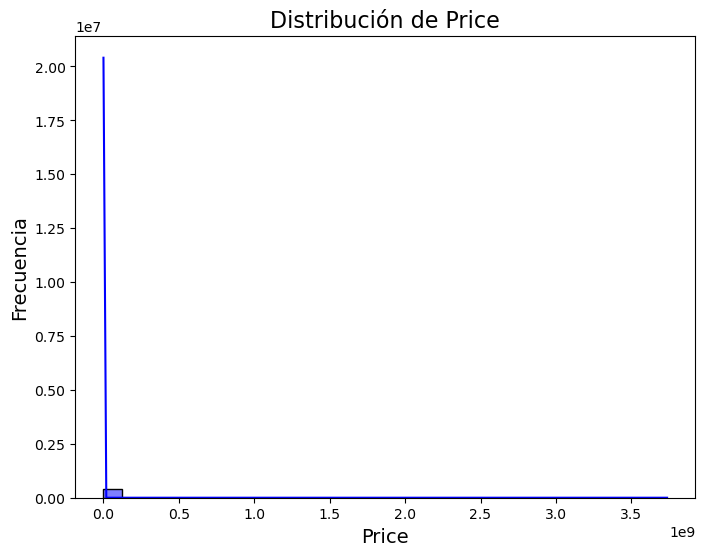

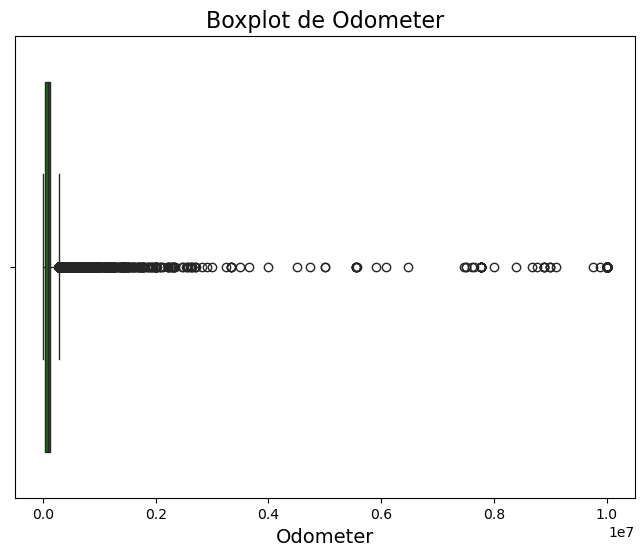

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de 'price'
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=30, color='blue')
plt.title('Distribución de Price', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.show()

# Diagrama de cajas (boxplot) de 'odometer'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['odometer'], color='green')
plt.title('Boxplot de Odometer', fontsize=16)
plt.xlabel('Odometer', fontsize=14)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15772\11898948.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['fuel'], order=df['fuel'].value_counts().index, palette='viridis')


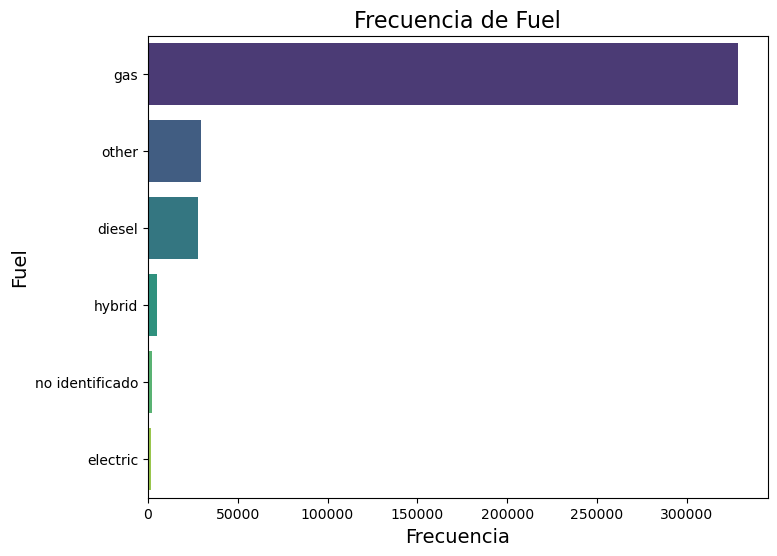

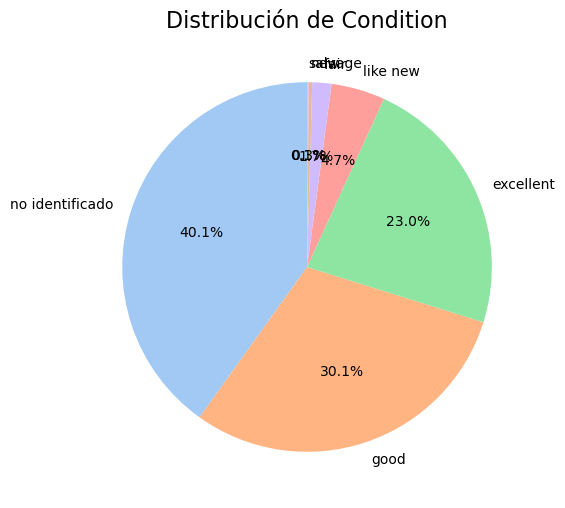

In [43]:
# Gráfico de barras para 'fuel'
plt.figure(figsize=(8, 6))
sns.countplot(y=df['fuel'], order=df['fuel'].value_counts().index, palette='viridis')
plt.title('Frecuencia de Fuel', fontsize=16)
plt.xlabel('Frecuencia', fontsize=14)
plt.ylabel('Fuel', fontsize=14)
plt.show()

# Gráfico de pastel para 'condition'
plt.figure(figsize=(8, 6))
df['condition'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de Condition', fontsize=16)
plt.ylabel('')  # Quitar etiqueta del eje y
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15772\2906074931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette='coolwarm')


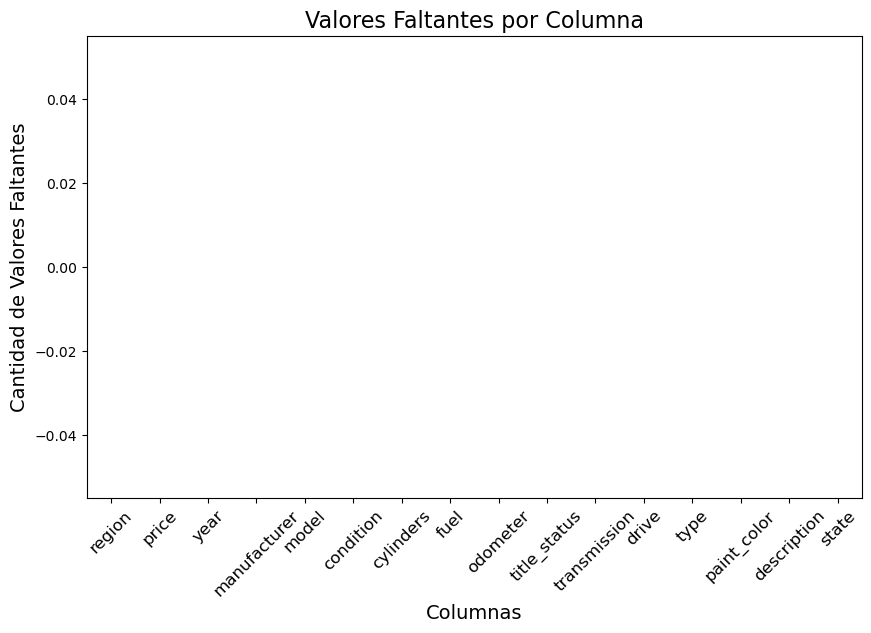

In [44]:
# Gráfico de valores faltantes
missing_data = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values, palette='coolwarm')
plt.xticks(rotation=45, fontsize=12)
plt.title('Valores Faltantes por Columna', fontsize=16)
plt.ylabel('Cantidad de Valores Faltantes', fontsize=14)
plt.xlabel('Columnas', fontsize=14)
plt.show()


In [45]:
from sklearn.impute import SimpleImputer

# Crear el imputador con la estrategia 'mean' para la media
imputer = SimpleImputer(strategy='mean')

# Imputar los valores nulos en las características numéricas
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
df[numeric_features] = imputer.fit_transform(df[numeric_features])

# Verificar que los valores nulos hayan sido imputados
print(df.isnull().sum())


region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
description     0
state           0
dtype: int64


In [46]:
# Crear el imputador con la estrategia 'constant'
imputer = SimpleImputer(strategy='constant', fill_value=0)

# Imputar los valores nulos en las características numéricas
df[numeric_features] = imputer.fit_transform(df[numeric_features])

# Verificar que los valores nulos hayan sido imputados
print(df.isnull().sum())


region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
description     0
state           0
dtype: int64


In [47]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
region,395170,0,0.0
price,395170,0,0.0
year,395170,0,0.0
manufacturer,395170,0,0.0
model,395170,0,0.0
condition,395170,0,0.0
cylinders,395170,0,0.0
fuel,395170,0,0.0
odometer,395170,0,0.0
title_status,395170,0,0.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395170 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   region        395170 non-null  category
 1   price         395170 non-null  float64 
 2   year          395170 non-null  float64 
 3   manufacturer  395170 non-null  category
 4   model         395170 non-null  category
 5   condition     395170 non-null  category
 6   cylinders     395170 non-null  category
 7   fuel          395170 non-null  category
 8   odometer      395170 non-null  float64 
 9   title_status  395170 non-null  category
 10  transmission  395170 non-null  category
 11  drive         395170 non-null  category
 12  type          395170 non-null  category
 13  paint_color   395170 non-null  category
 14  description   395170 non-null  object  
 15  state         395170 non-null  category
dtypes: category(12), float64(3), object(1)
memory usage: 21.6+ MB


**Graficos multivariados**

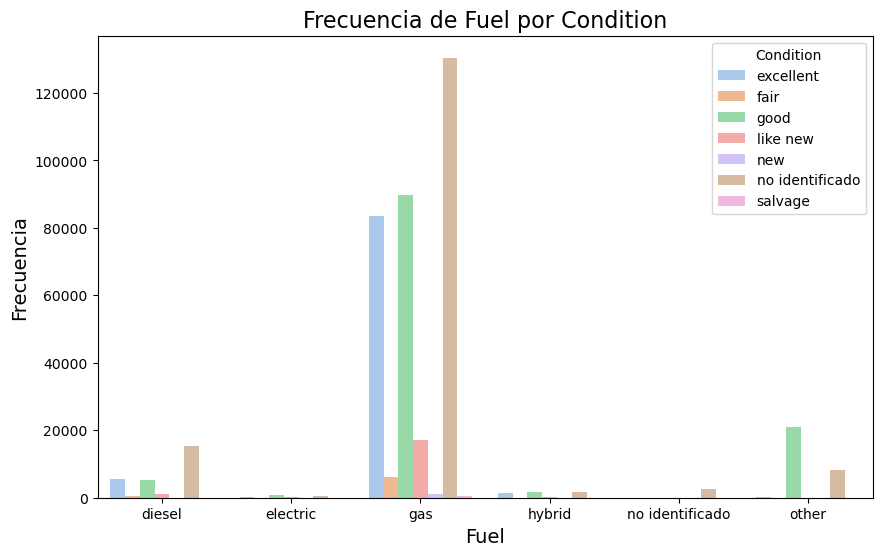

C:\Users\user\AppData\Local\Temp\ipykernel_15772\3241109394.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='condition', y='price', data=df, palette='muted', scale='width')
C:\Users\user\AppData\Local\Temp\ipykernel_15772\3241109394.py:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='condition', y='price', data=df, palette='muted', scale='width')


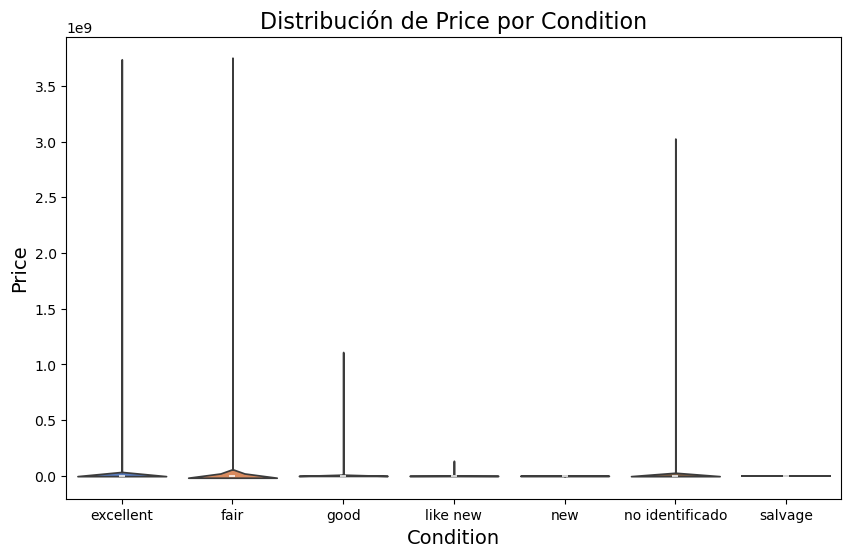

In [49]:
# Gráfico de barras agrupadas: 'fuel' vs 'condition'
plt.figure(figsize=(10, 6))
sns.countplot(x='fuel', hue='condition', data=df, palette='pastel')
plt.title('Frecuencia de Fuel por Condition', fontsize=16)
plt.xlabel('Fuel', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.legend(title='Condition')
plt.show()

# Gráfico de violín: 'price' por 'condition'
plt.figure(figsize=(10, 6))
sns.violinplot(x='condition', y='price', data=df, palette='muted', scale='width')
plt.title('Distribución de Price por Condition', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.show()

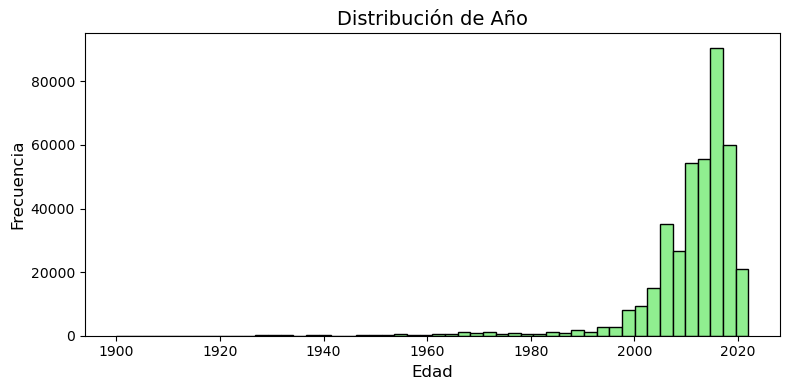

In [50]:
fig, ax = plt.subplots(figsize=(8, 4))
df['year'].plot(kind='hist', bins=50, color='lightgreen', edgecolor='black', ax=ax)
ax.set_title("Distribución de Año", fontsize=14)
ax.set_xlabel("Edad", fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.show()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395170 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   region        395170 non-null  category
 1   price         395170 non-null  float64 
 2   year          395170 non-null  float64 
 3   manufacturer  395170 non-null  category
 4   model         395170 non-null  category
 5   condition     395170 non-null  category
 6   cylinders     395170 non-null  category
 7   fuel          395170 non-null  category
 8   odometer      395170 non-null  float64 
 9   title_status  395170 non-null  category
 10  transmission  395170 non-null  category
 11  drive         395170 non-null  category
 12  type          395170 non-null  category
 13  paint_color   395170 non-null  category
 14  description   395170 non-null  object  
 15  state         395170 non-null  category
dtypes: category(12), float64(3), object(1)
memory usage: 29.7+ MB


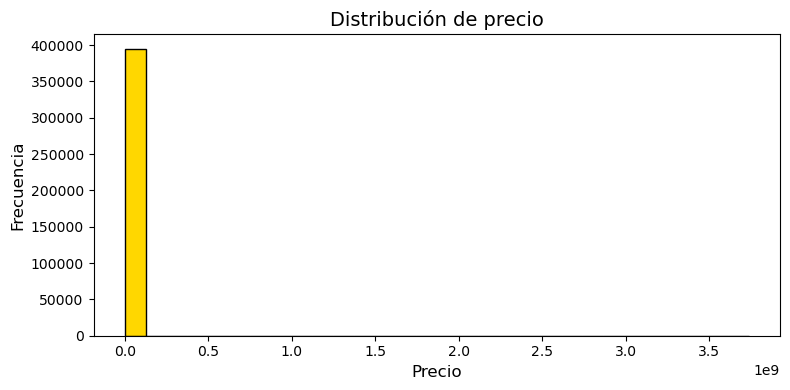

In [52]:
# Crear el gráfico para la columna numérica 'Promedio_nivel_glucosa'
fig, ax = plt.subplots(figsize=(8, 4))
df['price'].plot(kind='hist', bins=30, color='gold', edgecolor='black', ax=ax)
ax.set_title("Distribución de precio", fontsize=14)
ax.set_xlabel("Precio", fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15772\1810071217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel', y='price', data=df, palette='coolwarm')


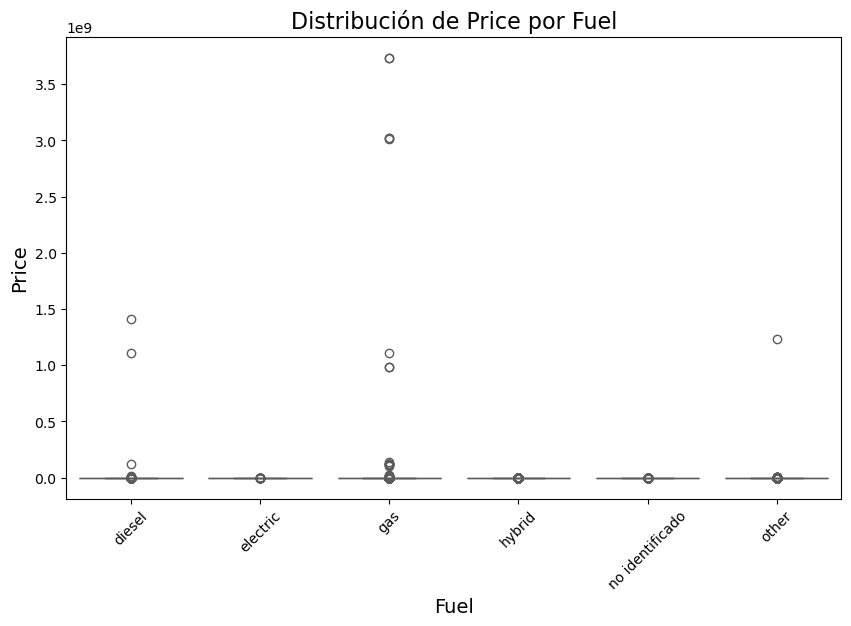

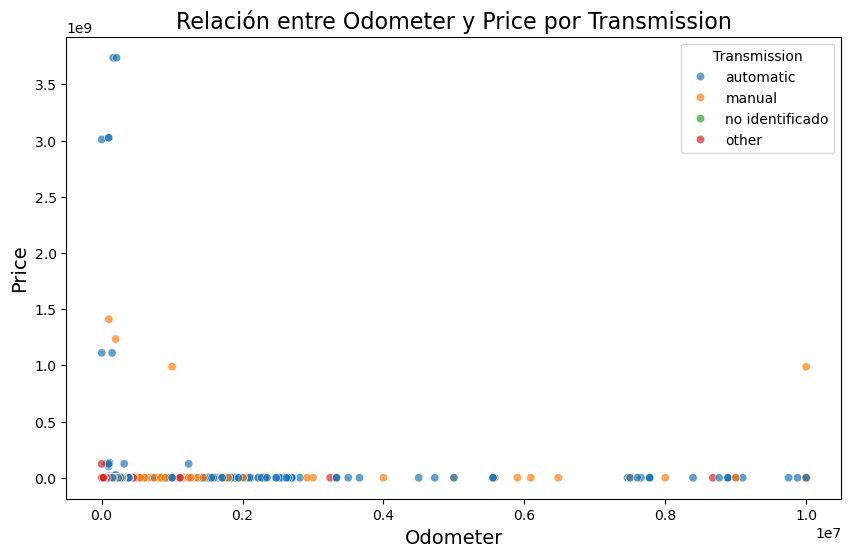

In [53]:
# Gráfico de cajas: 'price' por 'fuel'
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='price', data=df, palette='coolwarm')
plt.title('Distribución de Price por Fuel', fontsize=16)
plt.xlabel('Fuel', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Gráfico de dispersión categorizado: 'price' y 'odometer', coloreado por 'transmission'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='odometer', y='price', hue='transmission', data=df, alpha=0.7, palette='tab10')
plt.title('Relación entre Odometer y Price por Transmission', fontsize=16)
plt.xlabel('Odometer', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(title='Transmission')
plt.show()


**Calcular estadísticas descriptivas.**

In [54]:
df.describe()

,price,year,odometer
count,3.951700e+05,395170.000000,3.951700e+05
mean,7.999241e+04,2011.215973,9.676965e+04
std,1.266157e+07,9.615854,2.065894e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.995000e+03,2008.000000,3.676700e+04
50%,1.400000e+04,2014.000000,8.400000e+04
75%,2.699000e+04,2017.000000,1.321280e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [55]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Definir las columnas categóricas y numéricas
categorical_cols = X.select_dtypes(include=['category', 'object']).columns
numeric_features = X.select_dtypes(include=['float64', 'int']).columns

# Definir transformaciones para datos numéricos y categóricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Imputar valores nulos
    ('scaler', StandardScaler())                 # Escalar características numéricas
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # Codificar datos categóricos

# Crear un ColumnTransformer para combinar ambas transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # Transformar datos numéricos
        ('cat', categorical_transformer, categorical_cols)  # Transformar datos categóricos
    ])

# Aplicar el preprocesamiento
X_transformed = preprocessor.fit_transform(X)

print(X_transformed)

  (0, 0)	-0.0058438647422246045
  (0, 1)	0.7055053026531356
  (0, 2)	-0.06181182891974645
  (0, 279)	1.0
  (0, 439)	1.0
  (0, 19415)	1.0
  (0, 29032)	1.0
  (0, 29041)	1.0
  (0, 29047)	1.0
  (0, 29052)	1.0
  (0, 29058)	1.0
  (0, 29062)	1.0
  (0, 29069)	1.0
  (0, 29084)	1.0
  (0, 29094)	1.0
  (1, 0)	-0.005377887186805786
  (1, 1)	0.7055053026531356
  (1, 2)	-0.06181182891974645
  (1, 107)	1.0
  (1, 439)	1.0
  (1, 19415)	1.0
  (1, 29032)	1.0
  (1, 29041)	1.0
  (1, 29047)	1.0
  (1, 29052)	1.0
  :	:
  (395168, 11016)	1.0
  (395168, 29029)	1.0
  (395168, 29039)	1.0
  (395168, 29045)	1.0
  (395168, 29049)	1.0
  (395168, 29059)	1.0
  (395168, 29061)	1.0
  (395168, 29073)	1.0
  (395168, 29088)	1.0
  (395168, 29141)	1.0
  (395169, 0)	-0.003901765066334984
  (395169, 1)	0.80950036183951
  (395169, 2)	-0.3584585916874235
  (395169, 400)	1.0
  (395169, 411)	1.0
  (395169, 3485)	1.0
  (395169, 29029)	1.0
  (395169, 29041)	1.0
  (395169, 29045)	1.0
  (395169, 29049)	1.0
  (395169, 29059)	1.0
  (39516

In [56]:
# Supongamos que tu variable objetivo se llama 'price' y las demás son características
X = df.drop('price', axis=1)  # Características
y = df['price']  # Variable objetivo

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización de características numéricas (si es necesario)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Crear el imputador para manejar valores nulos (estrategia: media)
imputer = SimpleImputer(strategy='mean')

# Imputar valores nulos en X_train_scaled y X_test_scaled
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)  # Usar transform para consistencia

# Crear y entrenar el modelo de regresión lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluación del modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)  # Raíz del error cuadrático medio
r2_lr = r2_score(y_test, y_pred_lr)

# Imprimir los resultados
print(f"Modelo de Regresión Lineal:")
print(f"RMSE: {rmse_lr}")
print(f"R^2: {r2_lr}")


Modelo de Regresión Lineal:
RMSE: 21947182.608406845
R^2: -1.5898088169707947e-05


In [58]:
# Validar dimensiones
print("Dimensiones de X_train_scaled:", X_train_scaled.shape)
print("Dimensiones de y_train:", y_train.shape)

# Validar valores nulos
import numpy as np
print("Valores nulos en X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Valores nulos en y_train:", np.isnan(y_train).sum())

# Validar tipos
print("Tipo de X_train_scaled:", type(X_train_scaled))
print("Tipo de y_train:", type(y_train))


Dimensiones de X_train_scaled: (316136, 2)
Dimensiones de y_train: (316136,)
Valores nulos en X_train_scaled: 0
Valores nulos en y_train: 0
Tipo de X_train_scaled: <class 'numpy.ndarray'>
Tipo de y_train: <class 'pandas.core.series.Series'>


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
 
# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluación del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)  # Raíz del error cuadrático medio
r2_rf = r2_score(y_test, y_pred_rf)

# Imprimir los resultados
print(f"Modelo de Random Forest Regressor:")
print(f"RMSE: {rmse_rf}")
print(f"R^2: {r2_rf}")

Modelo de Random Forest Regressor:
RMSE: 21894102.942962293
R^2: 0.00481536633067603


In [60]:
print("\nComparación de Resultados:")
print(f"Modelo de Regresión Lineal - RMSE: {rmse_lr}, R²: {r2_lr}")
print(f"Modelo de Random Forest Regressor - RMSE: {rmse_rf}, R²: {r2_rf}")


Comparación de Resultados:
Modelo de Regresión Lineal - RMSE: 21947182.608406845, R²: -1.5898088169707947e-05
Modelo de Random Forest Regressor - RMSE: 21894102.942962293, R²: 0.00481536633067603


In [61]:
# Separar características (X) y variable objetivo (y)
X = df.drop('price', axis=1)
y = df['price']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputación de valores nulos para columnas numéricas
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

# Imputadores para características numéricas y categóricas
num_imputer = SimpleImputer(strategy='mean')  # Reemplazar nulos con la media
cat_imputer = SimpleImputer(strategy='most_frequent')  # Reemplazar nulos con el valor más frecuente

# Aplicar imputación a las columnas de entrenamiento y prueba
X_train_num = pd.DataFrame(num_imputer.fit_transform(X_train[num_cols]), columns=num_cols)
X_test_num = pd.DataFrame(num_imputer.transform(X_test[num_cols]), columns=num_cols)

X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[cat_cols]), columns=cat_cols)
X_test_cat = pd.DataFrame(cat_imputer.transform(X_test[cat_cols]), columns=cat_cols)

# Concatenar las columnas numéricas y categóricas imputadas
X_train_imputed = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_imputed = pd.concat([X_test_num, X_test_cat], axis=1)

# Estandarizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed[num_cols])
X_test_scaled = scaler.transform(X_test_imputed[num_cols])

# Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Métricas para Regresión Lineal
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Métricas para Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Comparación de resultados
print(f"Resultados del Modelo de Regresión Lineal:")
print(f"  MSE: {mse_lr:.2f}")
print(f"  RMSE: {rmse_lr:.2f}")
print(f"  R²: {r2_lr:.2f}")

print(f"\nResultados del Modelo Random Forest Regressor:")
print(f"  MSE: {mse_rf:.2f}")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R²: {r2_rf:.2f}")


Resultados del Modelo de Regresión Lineal:
  MSE: 481678824446755.88
  RMSE: 21947182.61
  R²: -0.00

Resultados del Modelo Random Forest Regressor:
  MSE: 479351743677030.06
  RMSE: 21894102.94
  R²: 0.00


**Seleccionar el mejor modelo basado en las métricas de evaluación.**

In [62]:
if rmse_rf < rmse_lr and r2_rf > r2_lr:
    print("\nEl mejor modelo basado en las métricas de evaluación es: Random Forest Regressor")
elif rmse_lr < rmse_rf and r2_lr > r2_rf:
    print("\nEl mejor modelo basado en las métricas de evaluación es: Regresión Lineal")
else:
    print("\nAmbos modelos tienen un rendimiento similar; selecciona según otros criterios (ej. interpretabilidad o complejidad).")




El mejor modelo basado en las métricas de evaluación es: Random Forest Regressor


**Optimización del Modelo:**

Optimizar el modelo seleccionado utilizando GridSearchCV.

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Separar características (X) y variable objetivo (y)
X = df.drop('price', axis=1)
y = df['price']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputación de valores nulos para columnas numéricas
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

# Imputadores para características numéricas y categóricas
num_imputer = SimpleImputer(strategy='mean')  # Reemplazar nulos con la media
cat_imputer = SimpleImputer(strategy='most_frequent')  # Reemplazar nulos con el valor más frecuente

# Aplicar imputación a las columnas de entrenamiento y prueba
X_train_num = pd.DataFrame(num_imputer.fit_transform(X_train[num_cols]), columns=num_cols)
X_test_num = pd.DataFrame(num_imputer.transform(X_test[num_cols]), columns=num_cols)

X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[cat_cols]), columns=cat_cols)
X_test_cat = pd.DataFrame(cat_imputer.transform(X_test[cat_cols]), columns=cat_cols)

# Concatenar las columnas numéricas y categóricas imputadas
X_train_imputed = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_imputed = pd.concat([X_test_num, X_test_cat], axis=1)

# Estandarizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed[num_cols])
X_test_scaled = scaler.transform(X_test_imputed[num_cols])

# Definir el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Definir el espacio de hiperparámetros con menos opciones
param_grid = {
    'n_estimators': [50, 100],  # Número de árboles en el bosque
    'max_depth': [10, 20],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5],  # Mínimo número de muestras para dividir un nodo
    'min_samples_leaf': [1, 2]  # Mínimo número de muestras en una hoja
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, 
                           n_jobs=-1, verbose=2)

# Ajustar el modelo con GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_

# Evaluar el modelo optimizado
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_scaled)

# Métricas para el modelo optimizado
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

# Imprimir los resultados
print(f"\nMejores hiperparámetros: {best_params}")
print("\nResultados del modelo optimizado:")
print(f"  MSE: {mse_optimized:.2f}")
print(f"  RMSE: {rmse_optimized:.2f}")
print(f"  R²: {r2_optimized:.2f}")




Fitting 3 folds for each of 16 candidates, totalling 48 fits

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Resultados del modelo optimizado:
  MSE: 479688613313084.19
  RMSE: 21901794.75
  R²: 0.00


**Crear visualizaciones con interpretaciones.**

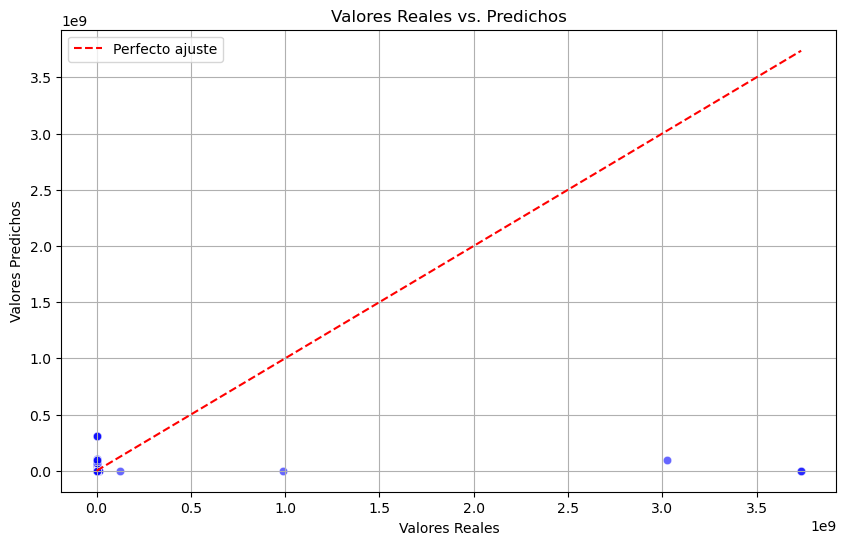

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_optimized, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfecto ajuste')
plt.title('Valores Reales vs. Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.legend()
plt.grid(True)
plt.show()


Histograma de Errores Residuales

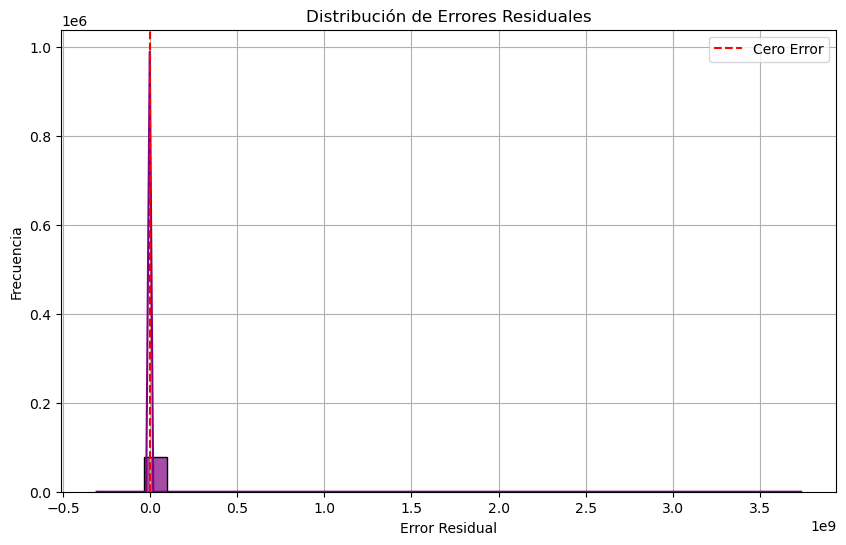

In [65]:
residuals = y_test - y_pred_optimized
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple', bins=30, alpha=0.7)
plt.title('Distribución de Errores Residuales')
plt.xlabel('Error Residual')
plt.ylabel('Frecuencia')
plt.axvline(0, color='red', linestyle='--', label='Cero Error')
plt.legend()
plt.grid(True)
plt.show()
